In [1]:
# hide
#export with 
#jupyter nbconvert EXAM.ipynb --to pdf --RegexRemovePreprocessor.patterns="['# hide']" --no-input  --output exam.pdf

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from scipy import stats

import sys
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax 
from iminuit import Minuit

from sklearn.model_selection import train_test_split

# Advance Methods on Applied Statistics

# Exam 
<br>

## Alejandro Maza Villalpando (HCJ888)
<br>

In [4]:
#ploting params 
FIGSIZE = (14,6)
FONTSIZE_T = 22
FONTSIZE_A = 18
FONTSIZE_L = 12

# fig, ax = plt.subplots(figsize=FIGSIZE)
# ax.plot(E_nu,PDF_1,label='Mass = 2.5 x 10^11g')
# ax.plot(E_nu,PDF_2,label='Mass = 4 x 10^11g')
# ax.plot(E_nu,PDF_3,label='Mass = 9 x 10^11g')
# ax.set_xlabel('Neutrino Energies (GeV)', fontsize=FONTSIZE_A)
# ax.set_ylabel('Probability Distribution', fontsize=FONTSIZE_A)
# ax.set_title('PDF of Neutrino Energies for Black Hole Masses ', fontsize=FONTSIZE_T)
# ax.legend(fontsize=FONTSIZE_L)
# plt.show()

# Problem 1
The data was read it and pass into a dataframe as shown bellow:

In [11]:
#read data 
df1 = pd.read_csv('http://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2022/data/Exam_2022_Prob1.txt',sep=" ",skiprows = 1,header = None)
df1.head()

,0,1,2,3,4
0,20.695507,-0.552985,9.0,1.190298,0.979081
1,21.777940,-0.219681,12.0,1.107390,1.500416
2,23.014198,0.609531,10.0,1.206525,1.445337
3,22.827932,0.810382,11.0,1.075362,0.353018
4,21.523835,0.363783,6.0,1.113602,1.524150


In [89]:
# possible functions f(x)
func1 = lambda x,a:np.sin(a*x) / (x+5) 
func2 = lambda x,a:np.sin(a*x) + 1 
func3 = lambda x,a:np.sin(a*x**2)
func4 = lambda x,a:np.sin(a*x + 1)**2
func5 = lambda x,a:x*np.tan(x)
func6 = lambda x,a,b: 1 + a*x + b*x**2
func7 = lambda x,a:5 + a*x
func8 = lambda x,a,b,c:np.sin(a*x) + c*np.exp(b*x) + 1
func9 = lambda x,a:np.exp(-((x - a)**2)/(2*b**2)) 

#constants range
# a = np.linspace(-10,10,1000)
# b = np.linspace(-10,10,1000)
# c = np.linsapce(4000,8000)

#possible functions f(k)
def bi(k,n,p):
    return stats.binom.pmf(k, n, p, loc=0)
def pos(k,mu):
    return stats.poisson.pmf(k, mu, loc=0)
def logar(p,k):
    return -1/(np.log(1-9)) * p**k / k 



In [85]:
x = np.linspace(20,27,1000)
def normal_func(pdf,x):
    return pdf/np.trapz(pdf,x)
func8_norm = normal_func(func8(x,6,-.3,8000),x)

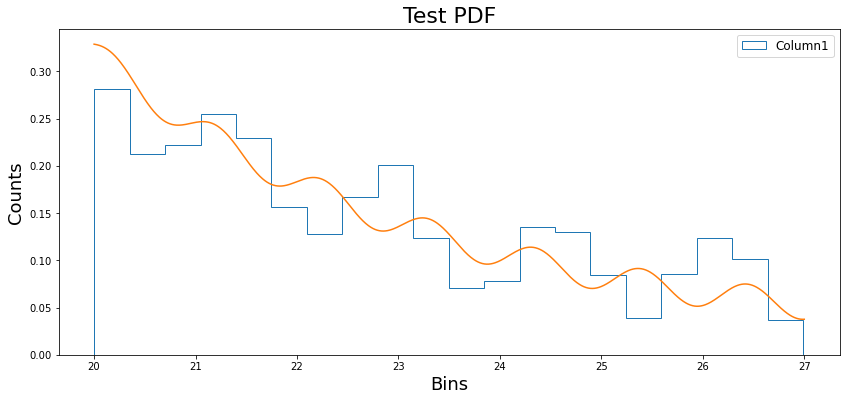

In [86]:
N_bins = 30 #int(np.sqrt(len(df1)))

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.hist(df1[0],bins=20,histtype='step', density= True, label= 'Column1')
ax.plot(x,func8_norm)
#ax.hist(df1[2],histtype='step', density= True, label= 'Column3')
ax.set_xlabel('Bins', fontsize=FONTSIZE_A)
ax.set_ylabel('Counts', fontsize=FONTSIZE_A)
ax.set_title('Test PDF', fontsize=FONTSIZE_T)
ax.legend(fontsize=FONTSIZE_L)
plt.show()

### func 2

In [100]:
x = np.linspace(-1,1,1000)
func6_norm = normal_func(func6(x,.6,1),x)

by inspection it is obvious that is a quadratic function, as an initial step a plot was generated with initial values of $a = 0.6$, and $b = 1.9$ 

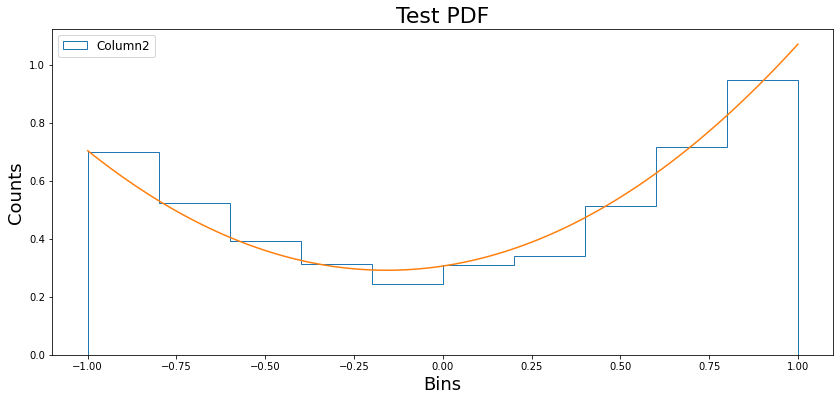

In [116]:
N_bins = 30 #int(np.sqrt(len(df1)))
x = np.linspace(-1,1,100)
func6_norm = normal_func(func6(x,.6,1.9),x)
fig, ax = plt.subplots(figsize=FIGSIZE)
# ax.hist(df1[0],bins=20,histtype='step', density= True, label= 'Column1')

ax.hist(df1[1],histtype='step', density= True, label= 'Column2')
ax.plot(x,func6_norm)
ax.set_xlabel('Bins', fontsize=FONTSIZE_A)
ax.set_ylabel('Counts', fontsize=FONTSIZE_A)
ax.set_title('Test PDF', fontsize=FONTSIZE_T)
ax.legend(fontsize=FONTSIZE_L)
plt.show()

then a raster scan is performed 

In [117]:
a = np.linspace(-10,10,200)
b = np.linspace(-10,10,200)
both_params = np.array(list(itertools.product(a,b)))
a_from_grid = np.expand_dims(both_params[:,0],axis=1)
b_from_grid = np.expand_dims(both_params[:,1],axis=1)

In [120]:

def log_likelihood(x,a,b):
    #The log-likelihood to get all of the x-points (together) given a gaussian PDF with parameters mean=mu,std=sigma.
    return np.sum(np.log(func6(x,a,b)),axis=1)
#return np.sum(np.log(likelihood(x,mu,sigma)),axis=1)
x_samples = np.expand_dims(x,axis=0)

scanned_llh = log_likelihood(x_samples,a_from_grid,b_from_grid)

/tmp/ipykernel_4145/3648892975.py:3: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(func6(x,a,b)),axis=1)


In [121]:
ind_max_llh = np.argmax(scanned_llh)

In [122]:
ind_max_llh

0

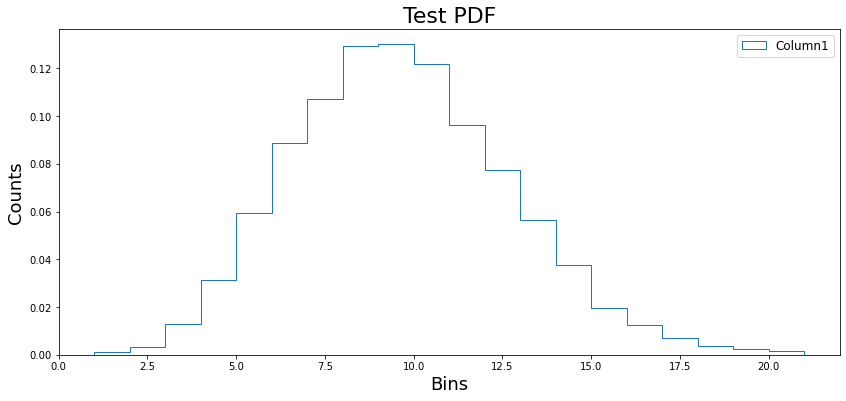

In [123]:
N_bins = 30 #int(np.sqrt(len(df1)))
x = np.linspace(-1,1,100)
func6_norm = normal_func(func6(x,.6,1.9),x)
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.hist(df1[2],bins=20,histtype='step', density= True, label= 'Column1')

# ax.hist(df1[1],histtype='step', density= True, label= 'Column2')
# ax.plot(x,func6_norm)
ax.set_xlabel('Bins', fontsize=FONTSIZE_A)
ax.set_ylabel('Counts', fontsize=FONTSIZE_A)
ax.set_title('Test PDF', fontsize=FONTSIZE_T)
ax.legend(fontsize=FONTSIZE_L)
plt.show()

By inspection is possible to see that the distribution has a periodic shape with an increase to the LHS. Testing function 8

In [49]:
xmin = min(df1[0])
xmax = max(df1[0]) 
counts, bin_edges = np.histogram(df1[0], bins=20)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
x = bin_centers[counts>0]
y = counts[counts>0]
s_counts = np.sqrt(counts)
sy = s_counts[counts>0]

In [50]:
chi2_fun8 = Chi2Regression(func8, x, y, sy)
chi2_fun8.errordef = 3
#find paramaters
minuit_fun8 = Minuit(chi2_fun8, a = 4,b =.1, c = 4000)  #      
# Perform the actual fit
minuit_fun8.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 364.1                      │              Nfcn = 507              │
│ EDM = 2.76e-05 (Goal: 0.0006)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.899   │   0.035   │            │            │         │         │       │
│ 1 │ b    │  -0.249   │   0.014   │            │            │         │         │       │
│ 2 │ c    │  0.073e6  │  0.024e6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │  0.00121 6.24e-06    -9.68 │
│ b │ 6.24e-06 0.000206     -337 │
│ c │    -9.68     -337 5.55e+08 │
└───┴────────────────────────────┘

In [51]:
Chi2_fun8 = minuit_fun8.fval
Ndof_fun8 = 3
Prob_fun8 = stats.chi2.sf(Chi2_fun8, Ndof_fun8)
Ndof_fun8

3

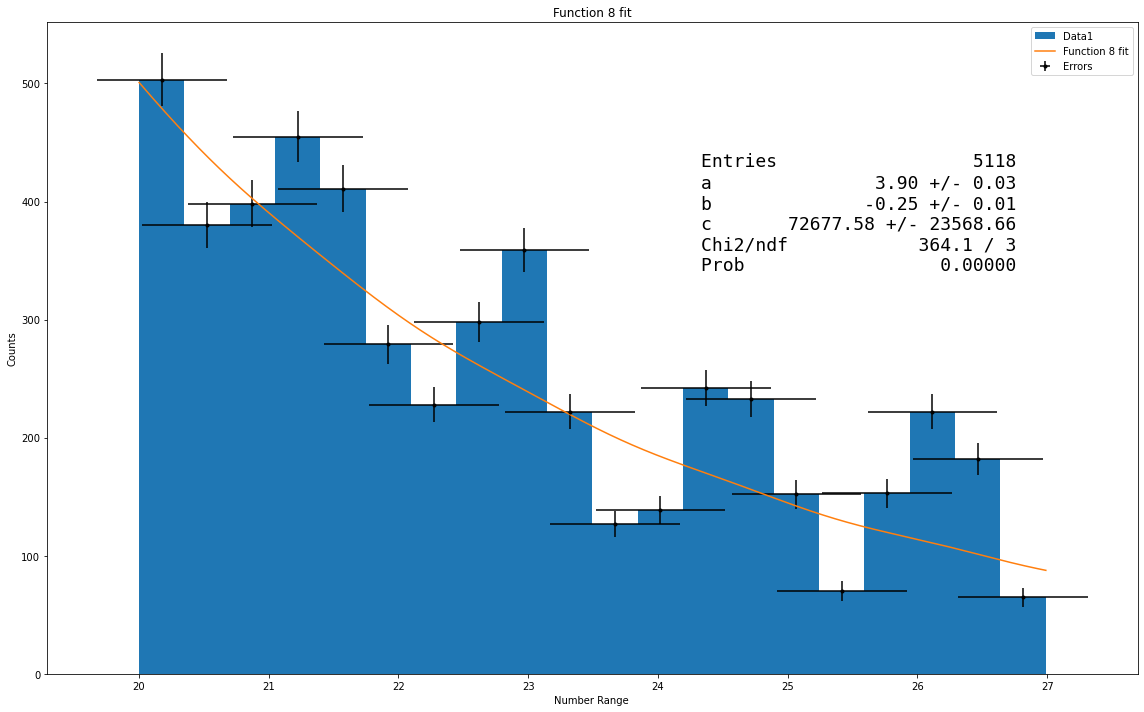

In [52]:
#plot
#plot parameters 
xaxis = np.linspace(xmin, xmax, 1000)
yaxis = func8(xaxis, *minuit_fun8.values[:])

#figure
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(df1[0],bins=N_bins,label='Data1')
ax.errorbar(x, y, yerr=sy, xerr=0.5, label='Errors', fmt='.k',  ecolor='k', elinewidth=1.5, capthick=2)
ax.plot(xaxis, yaxis, label=f'Function 8 fit')
ax.set(xlabel='Number Range ', ylabel='Counts',title='Function 8 fit')
#iminuit legend

names = ['Entries','a','b', 'c', 'Chi2/ndf', 'Prob']
values = ["{:d}".format(len(df1)),
              "{:.2f} +/- {:.2f}".format(minuit_fun8.values['a'], minuit_fun8.errors['a']),
              "{:.2f} +/- {:.2f}".format(minuit_fun8.values['b'], minuit_fun8.errors['b']),
              "{:.2f} +/- {:.2f}".format(minuit_fun8.values['c'], minuit_fun8.errors['c']),
              "{:.1f} / {:d}".format(Chi2_fun8, Ndof_fun8),
              "{:.5f}".format(Prob_fun8),
              ]
d={}
for n,v in zip(names,values):
    d[n]=v

ax.text(0.60, 0.80, nice_string_output(d, 0), family='monospace', 
        transform=ax.transAxes, fontsize=18, color='black', verticalalignment='top')

fig.tight_layout()
ax.legend()
plt.show()

# Problem 2

In [150]:
df2 = pd.read_csv('http://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2022/data/Exam_2022_Problem2.txt',sep=" ",skiprows = 2,header = None)
df2 = pd.DataFrame({'azimuth':df2[0], 'zenith':df2[1]})
# after inspecting the distribution seams that i need to change my azimuth angle range to -pi to pi
df2['azimuth'] = df2['azimuth'] - 3.141592 

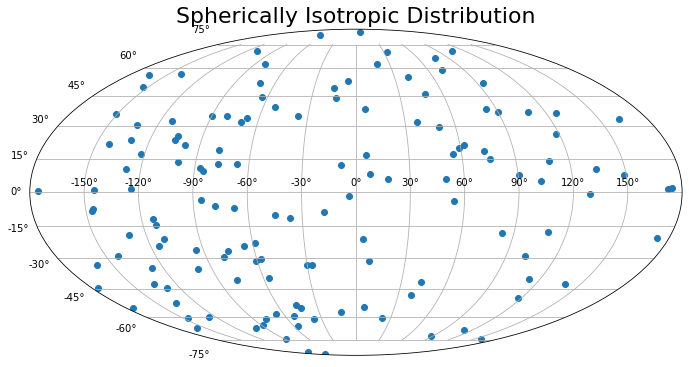

In [159]:
# hide 
ntot = 2*len(df2)
x  = np.random.uniform(-1,1,ntot) * np.pi
y  = np.arccos(np.random.uniform(-1,1,ntot))
plt.figure(figsize = FIGSIZE)
plt.subplot(111, projection="mollweide")
plt.grid(True)
#plt.scatter(x,-y+np.pi/2)
plt.scatter(df2['azimuth'],-df2['zenith']+np.pi/2)
plt.title( 'Spherically Isotropic Distribution' ,fontsize = FONTSIZE_T)
plt.show()

In [283]:
def auto_corr(az,zen,min_angle):
    x=np.zeros(Ntot)
    y=np.zeros(Ntot)
    z=np.zeros(Ntot)
    vector=np.zeros((Ntot,3))
    unit_vector=np.zeros((Ntot,3))
 
    
    for i in range(Ntot):
       
        x[i]=np.cos(az[i])*np.sin(zen[i])
        y[i]=np.sin(az[i])*np.sin(zen[i])
        z[i]=np.cos(zen[i])
        vector[i]=np.array([x[i],y[i],z[i]])
        unit_vector[i] = vector[i] / np.linalg.norm(vector[i])
        
   
    counts=np.zeros(Ntot)
    for i in range(Ntot):
        for j in range(i,Ntot):
            magA = np.dot(unit_vector[i],unit_vector[i])
            magB = np.dot(unit_vector[j],unit_vector[j])
            
            
            value=np.dot(unit_vector[i],unit_vector[j])
            angle = np.arccos(np.clip(value/np.abs(magA*magB),-1,1))
            
            counts[i]+= (2/(Ntot*(Ntot-1)))*(np.heaviside(np.cos(angle)-np.cos(min_angle),0))
    return np.sum(counts)



In [284]:
N= 150
resolution=100
x_space=np.linspace(-1,1,resolution)
azi=np.random.uniform(-np.pi,np.pi,Ntot) # azimuth
zen=np.arccos(np.random.uniform(-1,1,Ntot))# zenith

def run_corr(N,resolution, azi, zen):
    
    corr=np.zeros(resolution)
   
    for i,m in enumerate(x_space):
        corr[i]=auto_corr(azi,zen,np.arccos(m))
    return corr

corr_rand = run_corr(N,resolution, azi, zen)

In [285]:
N=len(df2)

azi=df2['azimuth'].values 
zen=df2['zenith'].values
corr_dat=run_corr(N,resolution, azi, zen)
# x_space=np.linspace(-1,1,resolution)
# for i,m in enumerate(x_space):
#     corr_dat[i]=auto_corr(azi,zen,np.arccos(m))


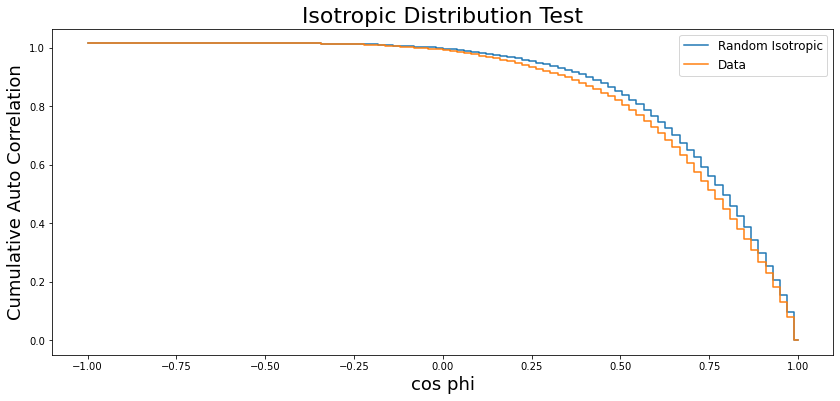

In [286]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(x_space,corr_rand,ds='steps-mid',label = 'Random Isotropic')
ax.plot(x_space,corr_dat,ds='steps-mid', label = 'Data')
ax.set_xlabel('cos phi', fontsize=FONTSIZE_A)
ax.set_ylabel('Cumulative Auto Correlation', fontsize=FONTSIZE_A)
ax.set_title('Isotropic Distribution Test', fontsize=FONTSIZE_T)
ax.legend(fontsize=FONTSIZE_L)
plt.show()

In [287]:
max(np.cos(df2['zenith']))

0.9970369644205967

In [288]:
stats.kstest(corr_rand,corr_dat)

KstestResult(statistic=0.04, pvalue=0.999998821968263)

# Problem 2b

Hypothesis A: That 20% of the total sample is uniformly distributed
in azimuth over the range {0.225π, 0.725π} and uniformly distributed
in zenith over the range {0.30π, 1π}, and the remaining 80% is fully
isotropic

In [289]:
#generate 20% of random data 
N= 150
random_azi = np.random.uniform(0.225*np.pi-np.pi,0.725*np.pi - np.pi,int(N*.2))
random_zen1 =  np.arccos(np.random.uniform(-1,1,N))
random_zen2 = random_zen1[(np.where((random_zen1 >= 0.3*np.pi) & (random_zen1 <= np.pi)))][:int(N*.2)]

#generate 80% isotropic
random_azi2 = np.random.uniform(-np.pi,np.pi,int(N*.8))
random_zen3 = np.arccos(np.random.uniform(-1,1,int(N*.8)))

#join data 
azi = np.concatenate((random_azi, random_azi2), axis=None)
zen = np.concatenate((random_zen2, random_zen3), axis=None)


In [290]:
corr_hyp_a = run_corr(N,resolution, azi, zen)

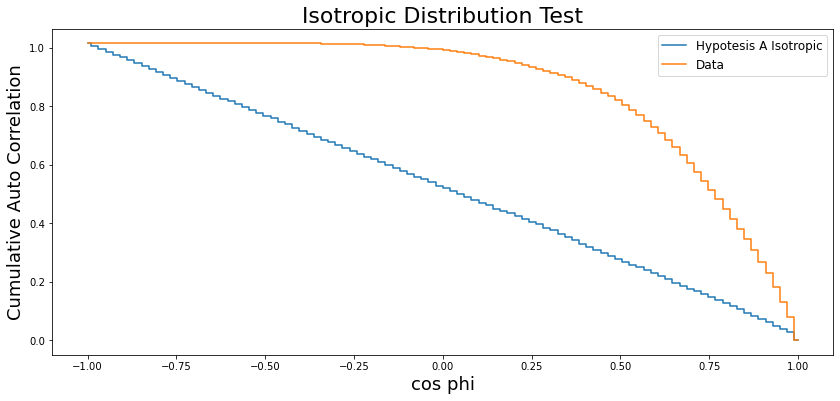

In [291]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(x_space,corr_hyp_a,ds='steps-mid',label = 'Hypotesis A Isotropic')
ax.plot(x_space,corr_dat,ds='steps-mid', label = 'Data')
ax.set_xlabel('cos phi', fontsize=FONTSIZE_A)
ax.set_ylabel('Cumulative Auto Correlation', fontsize=FONTSIZE_A)
ax.set_title('Isotropic Distribution Test', fontsize=FONTSIZE_T)
ax.legend(fontsize=FONTSIZE_L)
plt.show()

In [292]:
stats.kstest(corr_hyp_a,corr_dat)

KstestResult(statistic=0.56, pvalue=8.771130313572204e-15)

In [293]:
len(test)*.2

27.8

Hypothesis B: That 15% of the total sample is uniformly distributed
in azimuth over the range {0π, 1π} and uniformly distributed in zenith
over the range {0.5π, 1π}, and the remaining 85% is fully isotropic.

In [295]:
N= 150
random_azi = np.random.uniform(-np.pi,0,int(N*.15))
random_zen1 =  np.arccos(np.random.uniform(-1,1,N))
random_zen2 = random_zen1[(np.where((random_zen1 >= 0.5*np.pi) & (random_zen1 <= np.pi)))][:int(N*.15)]

#generate 80% isotropic
random_azi2 = np.random.uniform(-np.pi,np.pi,int(N*.85))
random_zen3 = np.arccos(np.random.uniform(-1,1,int(N*.85)))

#join data 
azi = np.concatenate((random_azi, random_azi2), axis=None)
zen = np.concatenate((random_zen2, random_zen3), axis=None)

NameError: name 'corr_hyp_a' is not defined

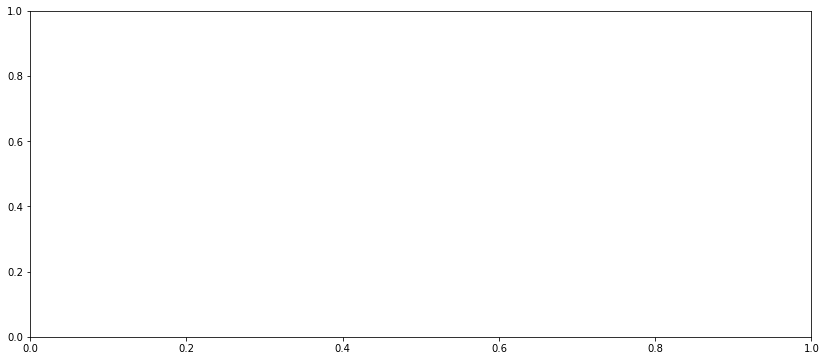

In [296]:
corr_hyp_b = run_corr(N,resolution, azi, zen)
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(x_space,corr_hyp_a,ds='steps-mid',label = 'Hypotesis A Isotropic')
ax.plot(x_space,corr_dat,ds='steps-mid', label = 'Data')
ax.set_xlabel('cos phi', fontsize=FONTSIZE_A)
ax.set_ylabel('Cumulative Auto Correlation', fontsize=FONTSIZE_A)
ax.set_title('Isotropic Distribution Test', fontsize=FONTSIZE_T)
ax.legend(fontsize=FONTSIZE_L)
plt.show()

In [ ]:
stats.kstest(corr_hyp_b,corr_dat)